In [4]:
import os
import math 
import statistics
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [5]:
TRAIN_DIR = 'C:/Users/dolon/OneDrive/Desktop/CVPR_Assignment/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:00<00:00, 8530.10it/s]


50000


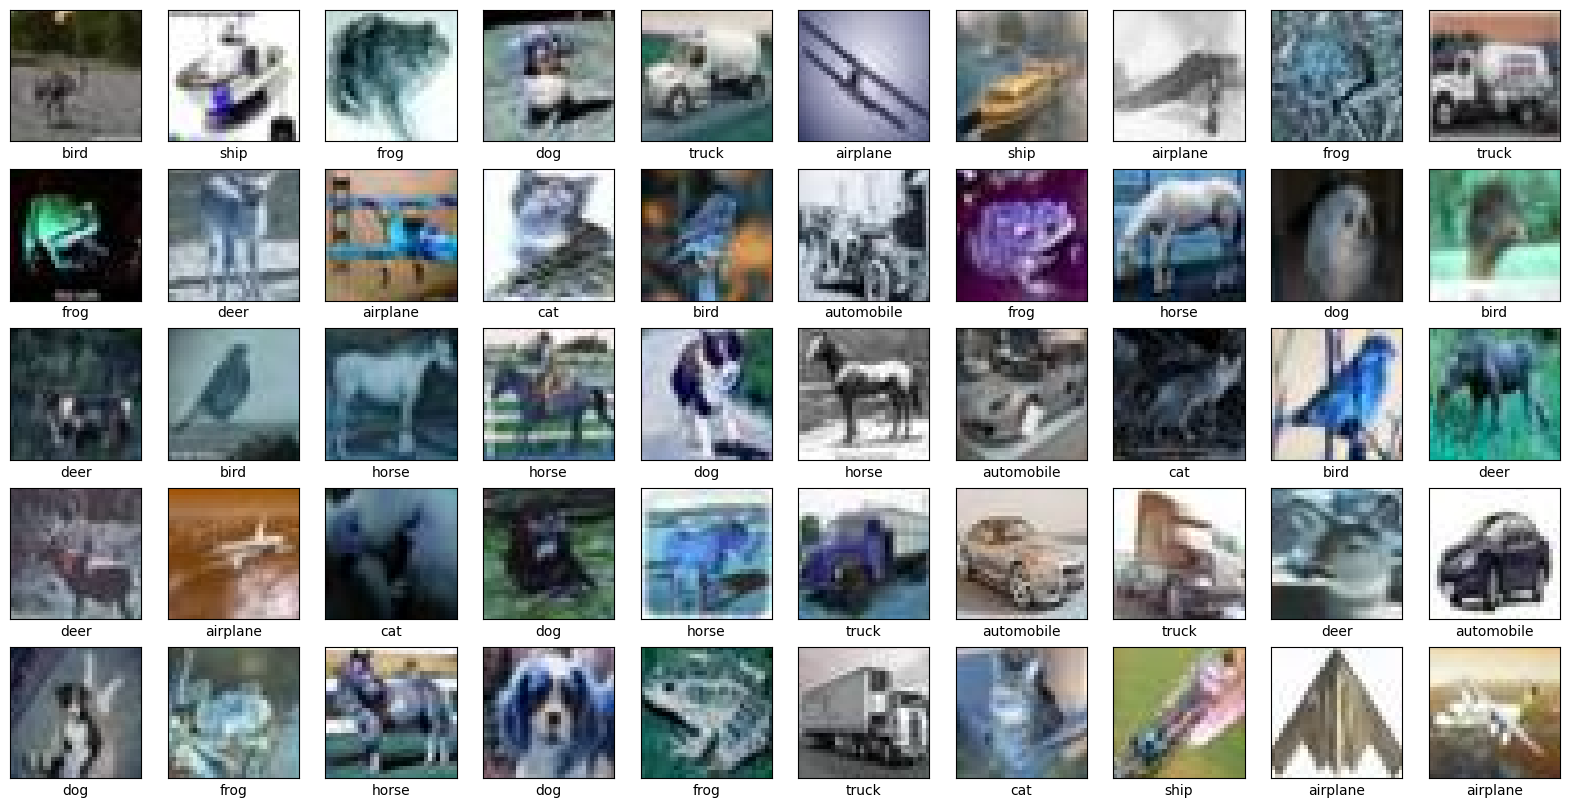

In [7]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

Split the dataset

In [8]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [9]:
for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
        dist1 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist1.append([l2_distance, t[1], v[1]] ) # Distance , Training Label , Validation Label   
            
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
        dist2 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist2.append([l2_distance, t[1], v[1]] )   # Distance , Training Label , Validation Label       

    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
        dist3 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist3.append([l2_distance, t[1], v[1]] )  # Distance , Training Label , Validation Label   

    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
        dist4 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist4.append([l2_distance, t[1], v[1]] )  # Distance , Training Label , Validation Label    
          
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4
        dist5 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist5.append([l2_distance, t[1], v[1]] )    # Distance , Training Label , Validation Label           

100%|██████████| 1000/1000 [00:44<00:00, 22.54it/s]


In [10]:
print (len(dist1), len(dist2),len(dist3),len(dist4),len(dist5))

4000000 4000000 4000000 4000000 4000000


Split the distance list for each validation set, to chunks of 4000 and take min 20 values from each chunk

In [11]:
chunks = [dist1[i:i+4000] for i in range(0, len(dist1), 4000)]
fold1= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold1.append(top_20)

In [12]:
chunks = [dist2[i:i+4000] for i in range(0, len(dist2), 4000)]
fold2= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold2.append(top_20)

In [13]:
chunks = [dist3[i:i+4000] for i in range(0, len(dist3), 4000)]
fold3= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold3.append(top_20)

In [14]:
chunks = [dist4[i:i+4000] for i in range(0, len(dist4), 4000)]
fold4= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold4.append(top_20)

In [15]:
chunks = [dist5[i:i+4000] for i in range(0, len(dist5), 4000)]
fold5= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold5.append(top_20)

In [16]:
print(len(fold1), len(fold2),len(fold3),len(fold4),len(fold5))

1000 1000 1000 1000 1000


Predict label according to *k* value and create another list with respective *k value, predicted label and original label*

In [17]:
k_values =list(range(1, 21))
val_1=[]
val_2 =[]
val_3=[]
val_4 =[]
val_5=[]

for item in tqdm(fold1):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_1.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label
for item in tqdm(fold2):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_2.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

for item in tqdm(fold3):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_3.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

for item in tqdm(fold4):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_4.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

for item in tqdm(fold5):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_5.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

100%|██████████| 1000/1000 [00:00<00:00, 10360.76it/s]


In [18]:
print(len(val_1),len(val_2),len(val_3),len(val_4),len(val_5))

20000 20000 20000 20000 20000


Create a dictionary with *k* values as Keys and empty lists as values

In [29]:
k_to_accuracies= {}
for i in range(1, 21):
    k_to_accuracies[i] = []

Calculate accuracies for each fold and insert according to *k* value *(key)* in the dictionary

In [32]:
for k in k_values:
    count=0
    for item in val_1:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    accuracy = round(((count/1000)*100), 4)       
    k_to_accuracies[k].append(accuracy)      
           

In [33]:
for k in k_values:
    count=0
    for item in val_2:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    accuracy = round(((count/1000)*100), 4)       
    k_to_accuracies[k].append(accuracy)      

In [34]:
for k in k_values:
    count=0
    for item in val_3:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    accuracy = round(((count/1000)*100), 4)       
    k_to_accuracies[k].append(accuracy)       

In [35]:
for k in k_values:
    count=0
    for item in val_4:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    accuracy = round(((count/1000)*100), 4)       
    k_to_accuracies[k].append(accuracy)      

In [36]:
for k in k_values:
    count=0
    for item in val_5:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    accuracy = round(((count/1000)*100), 4)       
    k_to_accuracies[k].append(accuracy)     

Print all the accuracies for each *k* value

In [37]:
k_to_accuracies

{1: [18.9, 18.9, 17.6, 19.2, 18.7, 20.8],
 2: [18.9, 18.9, 17.6, 19.2, 18.7, 20.8],
 3: [20.9, 20.9, 17.1, 19.8, 19.2, 19.7],
 4: [21.1, 21.1, 18.5, 20.4, 19.1, 19.6],
 5: [21.0, 21.0, 17.2, 19.6, 19.1, 19.3],
 6: [20.4, 20.4, 17.3, 20.4, 20.3, 19.5],
 7: [21.2, 21.2, 16.8, 19.6, 20.6, 18.9],
 8: [21.5, 21.5, 17.2, 18.9, 20.5, 19.1],
 9: [22.3, 22.3, 16.9, 19.7, 21.1, 18.4],
 10: [20.8, 20.8, 16.9, 19.9, 20.8, 18.0],
 11: [20.6, 20.6, 17.0, 20.2, 20.4, 18.6],
 12: [21.0, 21.0, 17.7, 19.6, 20.4, 18.9],
 13: [21.0, 21.0, 17.6, 18.6, 21.0, 18.8],
 14: [21.2, 21.2, 17.9, 19.5, 21.7, 18.6],
 15: [21.4, 21.4, 18.3, 18.6, 21.4, 18.7],
 16: [20.8, 20.8, 18.2, 19.1, 20.6, 18.7],
 17: [20.8, 20.8, 18.5, 19.3, 21.4, 18.5],
 18: [20.7, 20.7, 18.4, 19.6, 21.8, 18.9],
 19: [20.4, 20.4, 18.0, 19.1, 21.3, 19.4],
 20: [20.3, 20.3, 18.0, 19.7, 20.8, 19.0]}

Graph Plotting

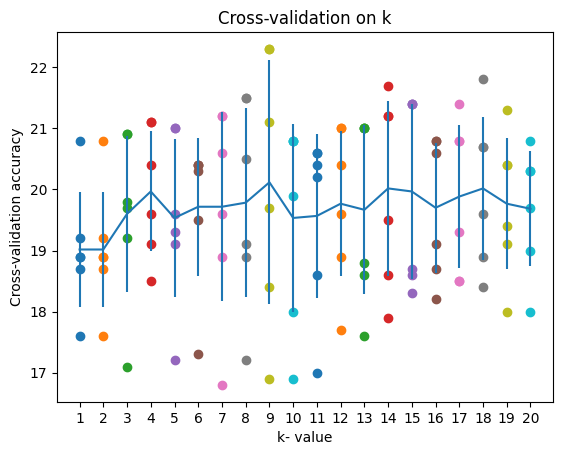

In [38]:
for k in k_values:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
x_values = list(range(1,21))
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_values, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k- value')
plt.ylabel('Cross-validation accuracy')
plt.xticks(range(min(x_values), max(x_values)+1, 1))
plt.show()

Discussion:
The given code imports required packages and collects image files and their corresponding class numbers from folders. The training data is shuffled randomly and divided into 5 groups for cross-validation. Euclidean distance is calculated for each image in each validation set and the rest of the training images, and the top 20 smallest distance values are collected for each validation image. Using these values, the corresponding label is predicted based on "k" values between 1 and 20, and the accuracy is measured for each value of k. Finally, a graph is plotted to show the precision for each k value, and the highest average accuracy is achieved when k=9.


